### CS 180 Group Project Presentation: Zachary Nabong, Roberto Santos and Shane So

Project Topic:  Predicting the effectiveness of the registration act relative to the frequency of spam messages being sent

## Introduction
In 2019, President BongBong Marcos signed the SIM Registration Act. According to the National Telecommunications Commission, this was in order to aid the Philippine National Police and other law enforcement authorities in curbing electronic communication-aided crimes like mobile phishing and text spams. It came into full effect on July 30, 2023, requiring all users to register their SIM cards to their respective telecom providers. Despite this, scam texts, phishing and calls still persist until the current year. There are doubts as to whether or not the SIM registration is actually being implemented effectively since there have been occasions where fake IDs were able to be used in order to register. One such case is the Philhealth monkey ID where a fake ID was used and accepted for SIM registration despite having a monkey as a photo and not a real person..

## Motivation
The importance to this project is to see whether or not this SIM Registration Act, was actually effective in its goal in preventing and mitigating spam messages or did it actually do nothing or actually made the problem worse. The goal of our project is to determine whether or not in the time that the SIM Registration Act was being implemented and after implementation did it have a direct relationship with the frequency of spam messages being sent to users.

## Scope of the Project
The scope of our project is done through the use of a dataset from Kaggle: https://www.kaggle.com/datasets/bwandowando/philippine-spam-sms-messages/data
The timeline of texts collected is from the near end of 2022 up until recently in April 2024. This recency of the data can help give a clearer conclusion as to whether or not the SIM Registration Act really was effective in its goal of mitigating spam and scam messages.


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [85]:
path = 'text-messages.csv'
df = pd.read_csv(path)
df.head()

,date-received,date-read,sender,category,text
0,2024-02-05 18:11:17,2024-02-05 18:11:24,+6390998***20,spam,"Make money while watching YouTube, earn 500P p..."
1,2023-03-28 16:28:37,2023-03-28 16:28:48,GCash,ads,Get up to P125K extra funds for emergencies wi...
2,2023-03-29 16:45:31,2023-03-29 16:45:38,GCash,notifs,<REDACTED>
3,2023-03-29 17:17:32,2023-03-29 17:17:43,GCash,notifs,<REDACTED>
4,2023-03-30 10:16:02,2023-03-30 10:16:03,GCash,OTP,<REDACTED>


In [86]:
df.columns

Index(['date-received', 'date-read', 'sender', 'category', 'text'], dtype='object')

In [87]:
df.shape

(3464, 5)

In [88]:
df['date-received'] = pd.to_datetime(df['date-received'])

df['week'] = df['date-received'].dt.to_period('W-MON')
df['month-year'] = df['date-received'].dt.to_period('M')

weekly_data = df.groupby(['week']).size().reset_index(name='message_count')
df_spam = df[df['category'] == 'spam']
weekly_spam = df_spam.groupby(['week']).size().reset_index(name='spam_count')
weekly_freq = pd.merge(weekly_data, weekly_spam, how='left', on='week')
weekly_freq = weekly_freq.fillna(0)
weekly_freq['spam_freq'] = weekly_freq['spam_count'] / weekly_freq['message_count']
weekly_freq

,week,message_count,spam_count,spam_freq
0,2022-09-27/2022-10-03,31,3.0,0.096774
1,2022-10-04/2022-10-10,38,3.0,0.078947
2,2022-10-11/2022-10-17,19,0.0,0.000000
3,2022-10-18/2022-10-24,56,4.0,0.071429
4,2022-10-25/2022-10-31,61,8.0,0.131148
...,...,...,...,...
70,2024-01-30/2024-02-05,49,22.0,0.448980
71,2024-02-06/2024-02-12,35,12.0,0.342857
72,2024-02-13/2024-02-19,47,9.0,0.191489
73,2024-02-20/2024-02-26,32,8.0,0.250000


In [89]:
monthly_data = df.groupby(['month-year']).size().reset_index(name='message_count')
monthly_spam = df_spam.groupby(['month-year']).size().reset_index(name='spam_count')
monthly_freq = pd.merge(monthly_data, monthly_spam, how='left', on='month-year')
monthly_freq = monthly_freq.fillna(0)
monthly_freq['spam_freq'] = monthly_freq['spam_count'] / monthly_freq['message_count']
monthly_freq

,month-year,message_count,spam_count,spam_freq
0,2022-09,4,2,0.500000
1,2022-10,201,16,0.079602
2,2022-11,181,21,0.116022
3,2022-12,135,10,0.074074
4,2023-01,188,1,0.005319
5,2023-02,198,10,0.050505
6,2023-03,190,13,0.068421
7,2023-04,196,32,0.163265
8,2023-05,247,44,0.178138
9,2023-06,269,21,0.078067


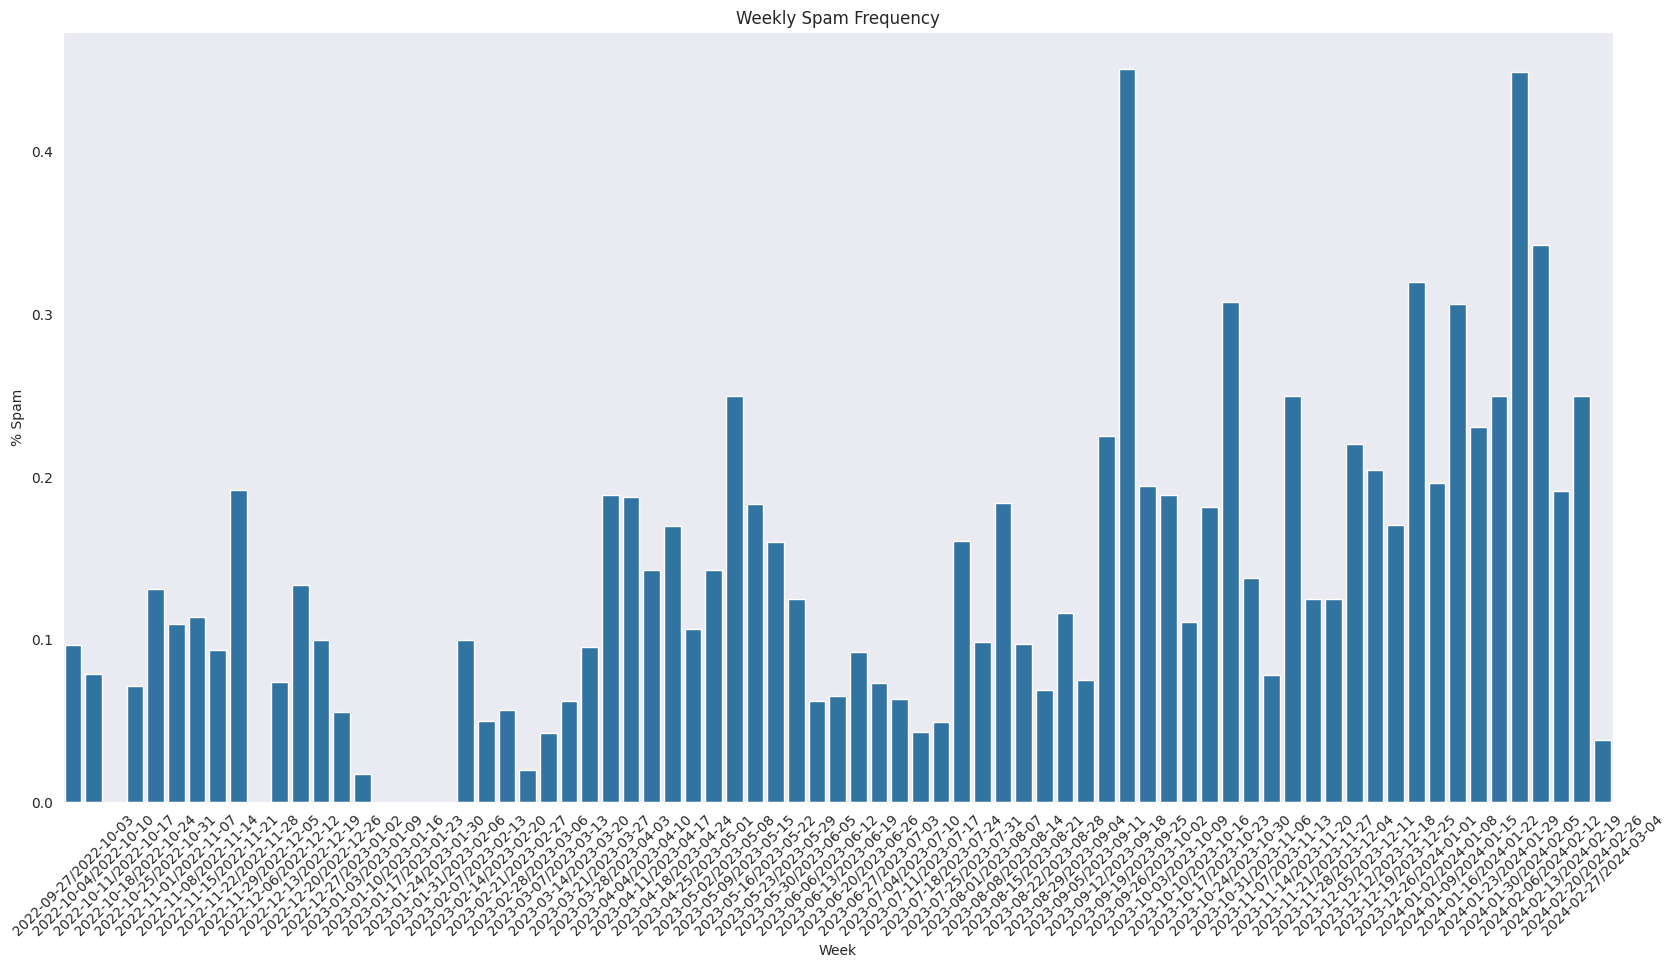

In [90]:
import seaborn as sns

#sns.relplot(x='date', y='carrier', data=df,
#            height=3.8, aspect=1.8, kind='scatter')
#sns.barplot(x='month-year', y='carrier', data=df)
#sns.set_style('dark')
plt.figure(figsize=(20, 10 ))
sns.barplot(x='week', y='spam_freq', data=weekly_freq)
sns.set_style('dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('% Spam')
plt.title('Weekly Spam Frequency')
plt.show()

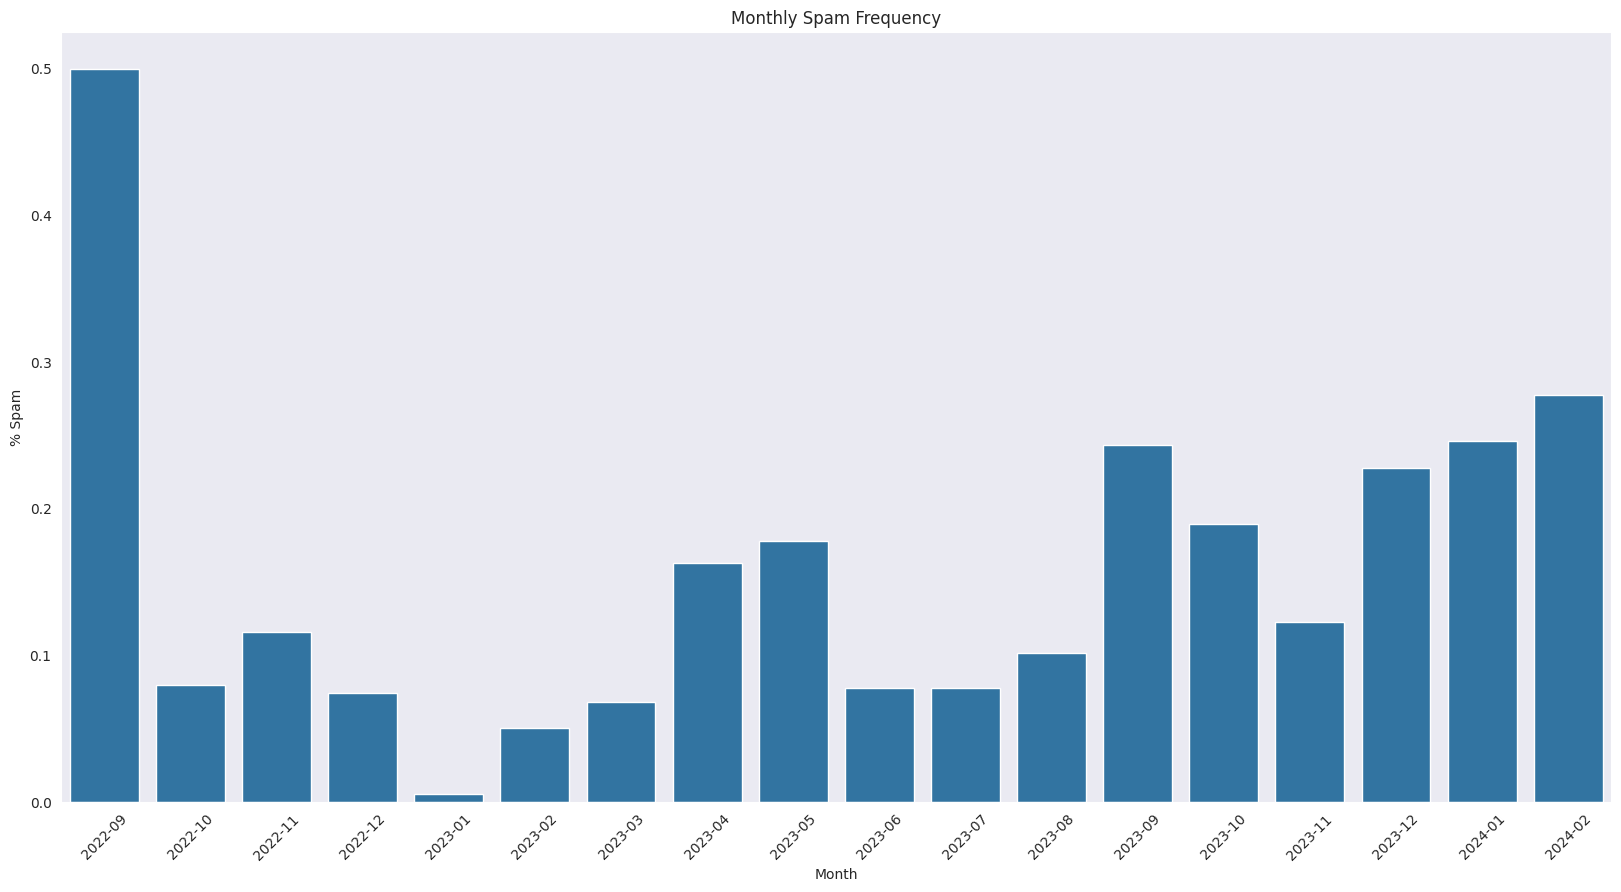

In [91]:
plt.figure(figsize=(20, 10 ))
sns.barplot(x='month-year', y='spam_freq', data=monthly_freq)
sns.set_style('dark')

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('% Spam')
plt.title('Monthly Spam Frequency')
plt.show()

SIM Registration Act:

Enacted:            September 27, 2022
Signed:             October 10, 2022
Commenced:          December 27, 2022
Deadline Extension: April 23, 2023
Final Deadline:     July 26, 2023
Grace Period End:   July 30, 2023
Monkey Moments:     September 5, 2023

LINEAR REGRESSION SECTION

In [92]:
weekly_freq['week_number'] = list(range(0, len(weekly_data)))
weekly_freq

,week,message_count,spam_count,spam_freq,week_number
0,2022-09-27/2022-10-03,31,3.0,0.096774,0
1,2022-10-04/2022-10-10,38,3.0,0.078947,1
2,2022-10-11/2022-10-17,19,0.0,0.000000,2
3,2022-10-18/2022-10-24,56,4.0,0.071429,3
4,2022-10-25/2022-10-31,61,8.0,0.131148,4
...,...,...,...,...,...
70,2024-01-30/2024-02-05,49,22.0,0.448980,70
71,2024-02-06/2024-02-12,35,12.0,0.342857,71
72,2024-02-13/2024-02-19,47,9.0,0.191489,72
73,2024-02-20/2024-02-26,32,8.0,0.250000,73


In [93]:
from sklearn.model_selection import train_test_split

data = pd.DataFrame()
x = weekly_freq[['week_number']]
y = weekly_freq['spam_freq']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(52, 1)
(23, 1)
(52,)
(23,)


In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

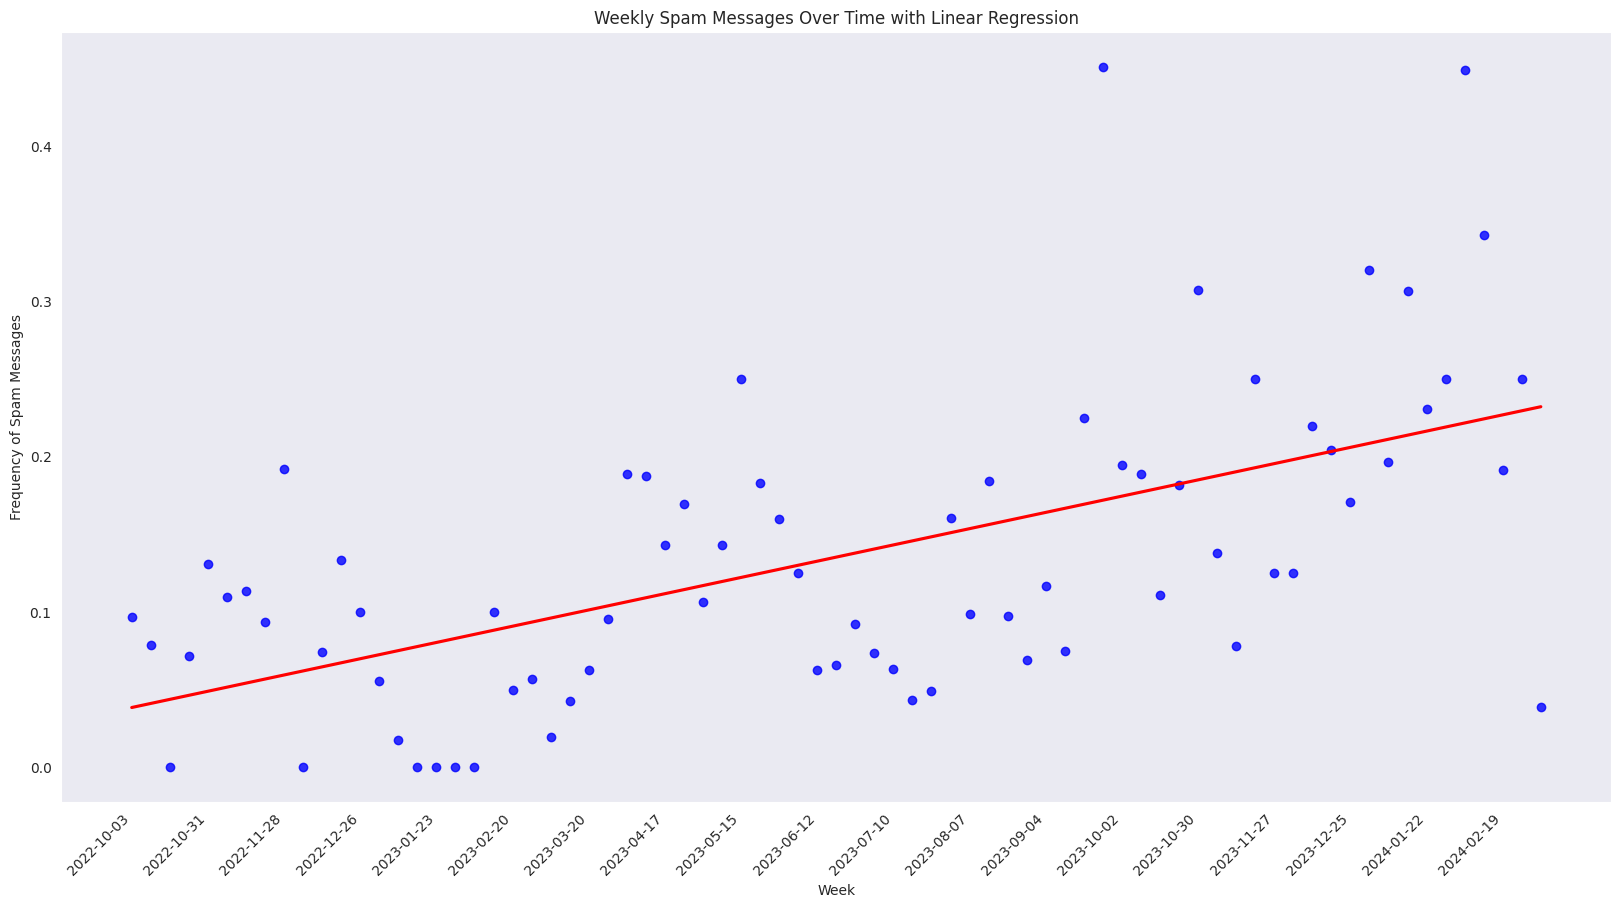

In [95]:
# Plot the data using Seaborn's regplot
plt.figure(figsize=(20, 10))
sns.set_style('dark')

# Using regplot to plot actual data points and the regression line
sns.regplot(x='week_number', y='spam_freq', data=weekly_freq, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Customize the plot
plt.xticks(ticks=np.arange(0, len(weekly_data), 4), labels=weekly_freq['week'].dt.strftime('%Y-%m-%d').iloc[::4], rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Frequency of Spam Messages')
plt.title('Weekly Spam Messages Over Time with Linear Regression')

plt.show()

In [96]:
y_pred = regressor.predict(x_test)
y_pred

array([0.0917536 , 0.18053885, 0.06955729, 0.2175327 , 0.17807259,
       0.1090174 , 0.143545  , 0.1262812 , 0.12874746, 0.19287014,
       0.15341003, 0.1608088 , 0.04982724, 0.17560634, 0.11148366,
       0.14107874, 0.08188858, 0.15094377, 0.13121371, 0.21260019,
       0.19040388, 0.22493147, 0.18793762])

In [97]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
19,0.100000,0.091754
55,0.181818,0.180539
10,0.074074,0.069557
70,0.448980,0.217533
54,0.111111,0.178073
26,0.188679,0.109017
40,0.063492,0.143545
33,0.183333,0.126281
34,0.160000,0.128747
60,0.125000,0.192870


In [98]:
residuals = y_test - y_pred
residuals

19    0.008246
55    0.001279
10    0.004517
70    0.231447
54   -0.066961
26    0.079662
40   -0.080053
33    0.057052
34    0.031253
60   -0.067870
44   -0.055049
47   -0.091843
2    -0.049827
53    0.013583
27    0.076016
39   -0.067549
15   -0.081889
43    0.009771
35   -0.006214
68    0.018169
59    0.059596
73    0.025069
58   -0.109813
Name: spam_freq, dtype: float64

In [99]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 0.056205565003332174


In [100]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.005548572987460328


In [101]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.07448874403196988


In [102]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.38049884603397766


Metrics for Before period:
  Mean Absolute Error (MAE): 0.03549743118173265
  Mean Squared Error (MSE): 0.002365233001909861
  Root Mean Squared Error (RMSE): 0.048633661201989115
  R-squared (R2): 0.03950782461057967

Metrics for During period:
  Mean Absolute Error (MAE): 0.0509934691318456
  Mean Squared Error (MSE): 0.003621084062496199
  Root Mean Squared Error (RMSE): 0.060175444015779386
  R-squared (R2): 0.14741989605509653

Metrics for After period:
  Mean Absolute Error (MAE): 0.06522398792281929
  Mean Squared Error (MSE): 0.00728871167933754
  Root Mean Squared Error (RMSE): 0.08537395199554453
  R-squared (R2): 0.2300365400482789



<ipython-input-103-1391a1414d8c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_freq.loc[weekly_freq['period'] == period, 'predicted_spam_count'] = predictions[period]


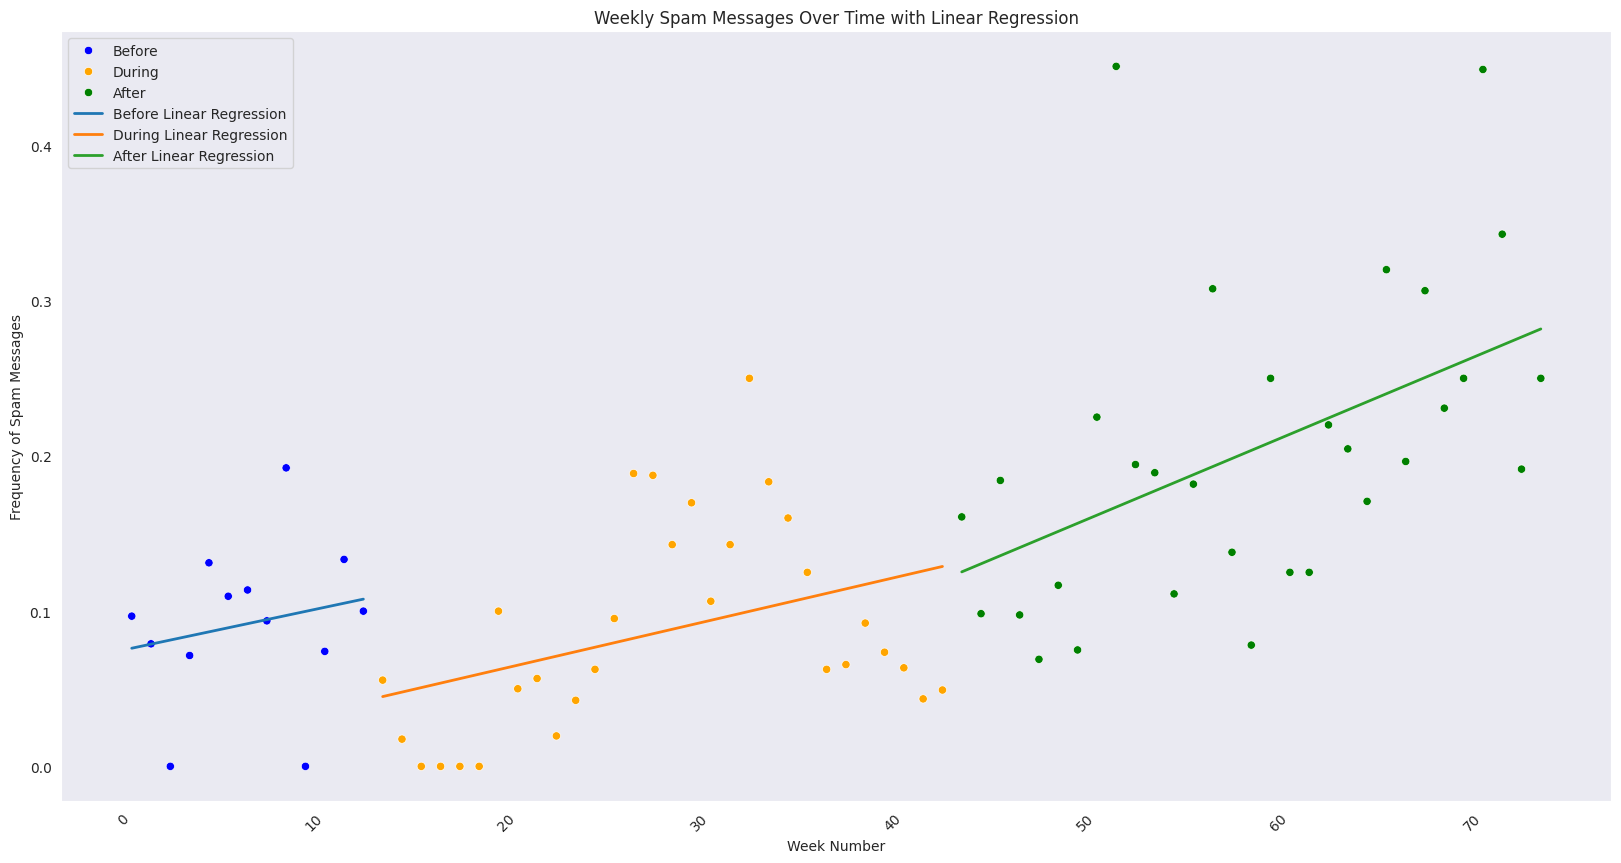

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'week' back to datetime for plotting
weekly_freq['week'] = weekly_freq['week'].dt.start_time

# Define the periods
sim_start = pd.to_datetime('2022-12-27')
sim_end = pd.to_datetime('2023-07-25')

# Create period labels
weekly_freq['period'] = pd.cut(weekly_freq['week'],
                               bins=[weekly_freq['week'].min(), sim_start, sim_end, weekly_freq['week'].max()],
                               labels=['Before', 'During', 'After'],
                               right=False)

# Drop rows with NaN in 'period' column
weekly_freq = weekly_freq.dropna(subset=['period'])

# Initialize dictionaries to store models, predictions, and metrics
models = {}
predictions = {}
metrics = {}

# Fit a linear regression model for each period
for period in weekly_freq['period'].unique():
    period_data = weekly_freq[weekly_freq['period'] == period]
    X = period_data[['week_number']]
    y = period_data['spam_freq']

    model = LinearRegression()
    model.fit(X, y)

    models[period] = model
    predictions[period] = model.predict(X)

    # Store the predictions in the dataframe
    weekly_freq.loc[weekly_freq['period'] == period, 'predicted_spam_count'] = predictions[period]

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, predictions[period])
    mse = mean_squared_error(y, predictions[period])
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions[period])
    metrics[period] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print the evaluation metrics for each period
for period in metrics.keys():
    print(f"Metrics for {period} period:")
    print(f"  Mean Absolute Error (MAE): {metrics[period]['MAE']}")
    print(f"  Mean Squared Error (MSE): {metrics[period]['MSE']}")
    print(f"  Root Mean Squared Error (RMSE): {metrics[period]['RMSE']}")
    print(f"  R-squared (R2): {metrics[period]['R2']}")
    print()

# Plot the data using Seaborn's scatterplot and Matplotlib's plot
plt.figure(figsize=(20, 10))

# Plot the actual data
sns.scatterplot(x='week_number', y='spam_freq', hue='period', data=weekly_freq, palette={'Before': 'blue', 'During': 'orange', 'After': 'green'})

# Plot the regression lines
for period in models.keys():
    period_data = weekly_freq[weekly_freq['period'] == period]
    plt.plot(period_data['week_number'], period_data['predicted_spam_count'], label=f'{period} Linear Regression', linewidth=2)

sns.set_style('dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Week Number')
plt.ylabel('Frequency of Spam Messages')
plt.title('Weekly Spam Messages Over Time with Linear Regression')
plt.legend()
plt.show()